<a href="https://colab.research.google.com/github/andremelzc/Practicas_Calificadas/blob/main/PC_energiacinetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Librerías

In [2]:
  !pip install rdkit
  !pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.2 MB/s eta 0:00:00


In [3]:
# Para graficar 2D y 3D, y generar coordenadas
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [4]:
# Para hallar la energía
from pyscf import gto, scf

## 2. Generando coordenadas

### ***a. Cis***

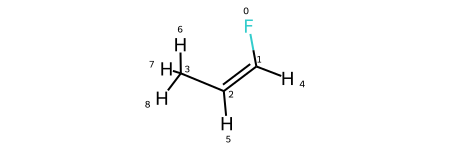

In [12]:
smilescis = "F\C=C/C"
cis = Chem.MolFromSmiles(smilescis)
cis = Chem.AddHs(cis)
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=0)
Chem.MolToXYZFile(cis, "initial_cis.xyz")
cis

In [13]:
cat initial_cis.xyz

9

F      1.098214    1.560041    0.370266
C      1.338691    0.259661    0.064198
C      0.289688   -0.533197   -0.128255
C     -1.094549    0.038552    0.000072
H      2.345815   -0.125201   -0.021813
H      0.387270   -1.581715   -0.375521
H     -1.107893    0.961223    0.597892
H     -1.554987    0.182709   -1.002230
H     -1.702249   -0.762072    0.495392


### ***b. Rotación***

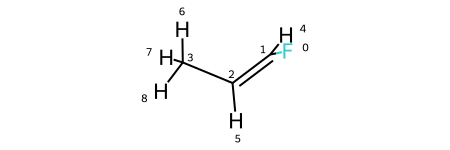

In [14]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "90.xyz")
cis

In [15]:
cat 90.xyz

9

F      1.830527    0.359296    1.325414
C      1.338691    0.259661    0.064198
C      0.289688   -0.533197   -0.128255
C     -1.094549    0.038552    0.000072
H      1.779554    0.803276   -0.760384
H      0.387270   -1.581715   -0.375521
H     -1.107893    0.961223    0.597892
H     -1.554987    0.182709   -1.002230
H     -1.702249   -0.762072    0.495392


### ***c. Trans***

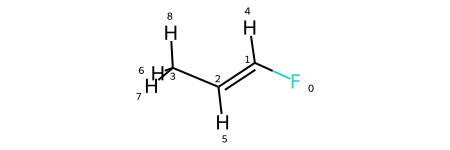

In [16]:
smilestrans = "F/C=C/C"
trans = Chem.MolFromSmiles(smilestrans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=0)
Chem.MolToXYZFile(trans, "initial_trans.xyz")
trans

In [17]:
cat initial_trans.xyz

9

F      2.564908   -0.306074   -0.048897
C      1.332810    0.249854    0.065968
C      0.238625   -0.472051   -0.091139
C     -1.131713    0.099251    0.026576
H      1.179863    1.312347    0.291970
H      0.363357   -1.537509   -0.317890
H     -1.581547   -0.062418    1.015498
H     -1.773924   -0.438884   -0.725250
H     -1.192380    1.155485   -0.216835


## 3. Calculando la energía

### ***a. Cis***

In [18]:
cis = gto.M(atom="initial_cis.xyz")

In [19]:
cis.basis = "3-21G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [20]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -214.252548921211


-214.2525489212107

### ***b. Rotación***

In [21]:
cis_90 = gto.M(atom="90.xyz")

In [22]:
cis_90.basis = "3-21G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [23]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -214.083985929233


-214.083985929233

### ***c. Trans***

In [24]:
trans = gto.M(atom="initial_trans.xyz")

In [25]:
trans.basis = "3-21G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [26]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -214.252529284338


-214.2525292843385

## 4. Gráfica

In [6]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-2hdq511d
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-2hdq511d
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9465 sha256=c3ddaaca15466fd9195e916b158a5a9653809f717c12ed300df7ebd51f8601fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-obxrp5vi/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


In [7]:
import matplotlib.pyplot as plt
from energydiagram import ED

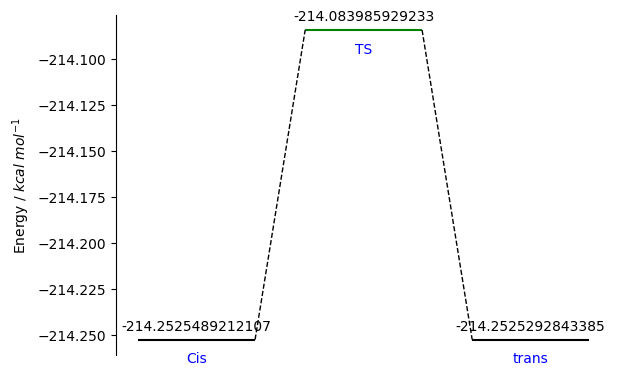

In [27]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis')
diagram.add_level(resultado_cis_90,'TS',color='g')
diagram.add_level(resultado_trans,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel


## 5. Hallando el tipo de reacción

In [30]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
